<a href="https://colab.research.google.com/github/mralamdari/CV-Yolo/blob/main/YoloV3_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Yolo with COCO Dataset

## 1.Clone and build Darknet

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15490 (delta 10), reused 18 (delta 8), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.10 MiB | 15.17 MiB/s, done.
Resolving deltas: 100% (10397/10397), done.


In [ ]:
# change makefile to have gpu and opencv enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
#Build(make) Darknet
!make

## 2. Yolov3 Weights

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## 3.Predict
    !./darknet detect <path to config> <path to weights> <path to image>

    imShow('predictions.jpg')



In [ ]:
!wget https://images.unsplash.com/photo-1583430999116-511887f6ee69?ixlib=rb-1.2.1&dl=donny-jiang-OWrC7nDbeM0-unsplash.jpg&q=80&fm=jpg&crop=entropy&cs=tinysrgb
!wget https://images.unsplash.com/photo-1483526682683-7560afbb5299?ixlib=rb-1.2.1&dl=elias-ehmann-eP93fjCLv4g-unsplash.jpg&q=80&fm=jpg&crop=entropy&cs=tinysrgb
!wget https://images.unsplash.com/photo-1520011554120-17c4c63fc213?ixlib=rb-1.2.1&dl=joseph-cooper-lEwc9W5eLH0-unsplash.jpg&q=80&fm=jpg&crop=entropy&cs=tinysrgb

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

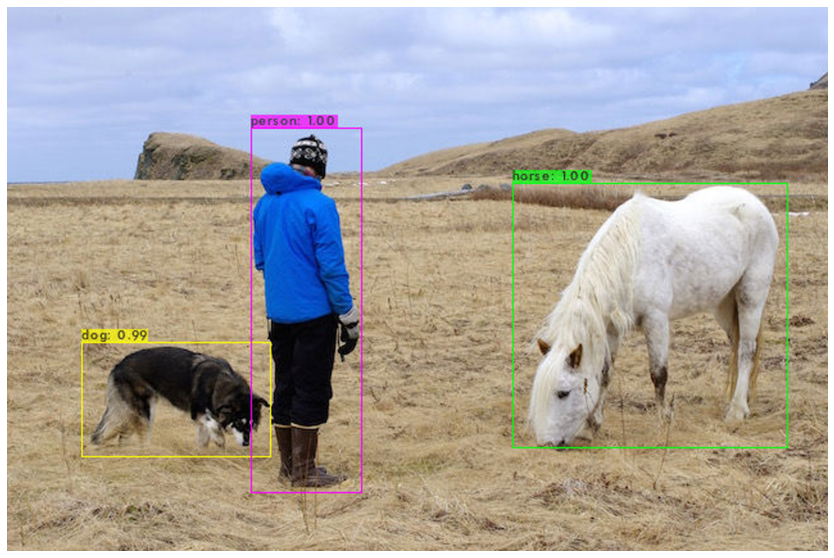

In [ ]:
imShow('predictions.jpg')

In [ ]:
# LOCAL MACHINE DOWNLOAD
download('predictions.jpg')

# GOOGLE DRIVE DOWNLOAD
!cp predictions.jpg /content/drive/MyDrive/Classroom/detection1.jpg

# Yolo with Custom Dataset

In [2]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 444, done.
remote: Total 444 (delta 0), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (444/444), 34.09 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (157/157), done.
